In [1]:
from __future__ import division
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
df = pd.DataFrame(pickle.load(open('../data_files/clean_recent_data.pkl', 'rb')))

In [ ]:
	first_name	pre_score	mid_score	post_score
0	Jason	4	25	5
1	Molly	24	94	43
2	Tina	31	57	23
3	Jake	2	62	23
4	Amy	3	70	51

In [3]:
features = df.columns.values.tolist()
features

['_projectid',
 '_teacher_acctid',
 '_schoolid',
 'school_state',
 'school_metro',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'vendor_shipping_charges',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'date_posted',
 'RESP',
 'month',
 'quarter',
 'year',
 'time_to_expire',
 'optional_support',
 'school_previous_projects',
 'teacher_previous_projects',
 'log_price_including',
 'log_price_excluding',
 'sqrt_students_reached',
 'student_bins',
 'price_in_bins',
 'price_ex_bins',
 'teacher_gender',
 'price_per_student',
 'price_per_student_bins',
 'total_state_donors',
 'total_state_projects',
 'state_avg_donors']

In [36]:
groups = df.RESP.groupby(df.price_in_bins)
sum_df = pd.DataFrame(groups.sum())
sum_df['key'] = sum_df.index
count_df = pd.DataFrame(groups.count())
count_df['key'] = count_df.index
count_df
merged = pd.merge(sum_df, count_df, on='key')
merged.columns = ['sum', 'key', 'count']
merged['per'] = merged['sum']/merged['count']
merged

,sum,key,count,per
0,17368,0,19154,0.906756
1,16109,1,18669,0.862874
2,15354,2,18659,0.822874
3,15182,3,19342,0.784924
4,13489,4,18015,0.748765
5,11663,5,16165,0.721497
6,11271,6,15759,0.715210
7,13042,7,19536,0.667588
8,11084,8,17460,0.634822
9,20884,9,42263,0.494144


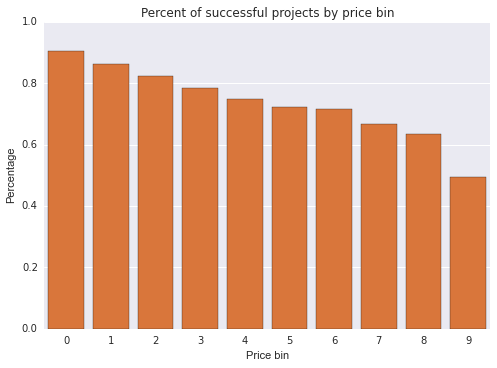

In [48]:
import seaborn as sns
sns.barplot(x = merged.key, y = merged.per, color = '#f36f21' )
ax = plt.gca()
plt.xlabel("Price bin")
plt.ylabel("Percentage")
plt.title("Percent of successful projects by price bin")
plt.show()

In [53]:
groups = df.RESP.groupby(df.price_per_student_bins)
sum_df = pd.DataFrame(groups.sum())
sum_df['key'] = sum_df.index
count_df = pd.DataFrame(groups.count())
count_df['key'] = count_df.index
count_df
merged = pd.merge(sum_df, count_df, on='key')
merged.columns = ['sum', 'key', 'count']
merged['per'] = merged['sum']/merged['count']
merged

,sum,key,count,per
0,15262,0,19286,0.791351
1,14150,1,18530,0.763627
2,13839,2,18004,0.768663
3,15194,3,19088,0.795997
4,14802,4,19447,0.761146
5,15120,5,20368,0.742341
6,14152,6,19808,0.714459
7,13133,7,19188,0.684438
8,13780,8,21028,0.655317
9,16014,9,30275,0.528951


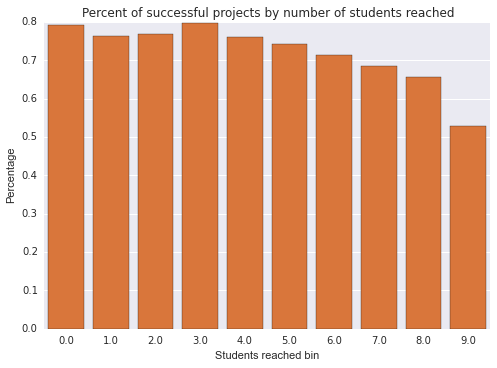

In [54]:
sns.barplot(x = merged.key, y = merged.per, color = '#f36f21' )
ax = plt.gca()
plt.xlabel("Students reached bin")
plt.ylabel("Percentage")
plt.title("Percent of successful projects by number of students reached")
plt.show()

In [63]:
df.state_avg_donors = df.state_avg_donors.map(lambda x: round(x, 0))
groups = df.RESP.groupby(df.state_avg_donors)
sum_df = pd.DataFrame(groups.sum())
sum_df['key'] = sum_df.index
count_df = pd.DataFrame(groups.count())
count_df['key'] = count_df.index
count_df
merged = pd.merge(sum_df, count_df, on='key')
merged.columns = ['sum', 'key', 'count']
merged['per'] = merged['sum']/merged['count']
merged

,sum,key,count,per
0,18097,3,26122,0.692788
1,48195,4,67912,0.709668
2,66167,5,93718,0.706022
3,9322,6,12523,0.744390
4,3665,7,4747,0.772067


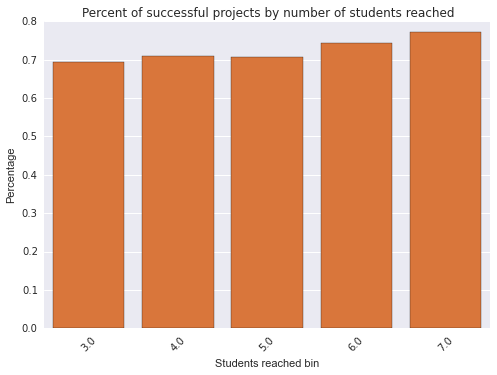

In [64]:
sns.barplot(x = merged.key, y = merged.per, color = '#f36f21' )
ax = plt.gca()
plt.xlabel("Students reached bin")
plt.ylabel("Percentage")
plt.title("Percent of successful projects by number of students reached")
plt.xticks(rotation=45)
plt.show()